<p><font size="6" color='grey'> <b>
Python meets ChatGPT
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Projekt Aktienkurse
</b></font> </br></p>


---

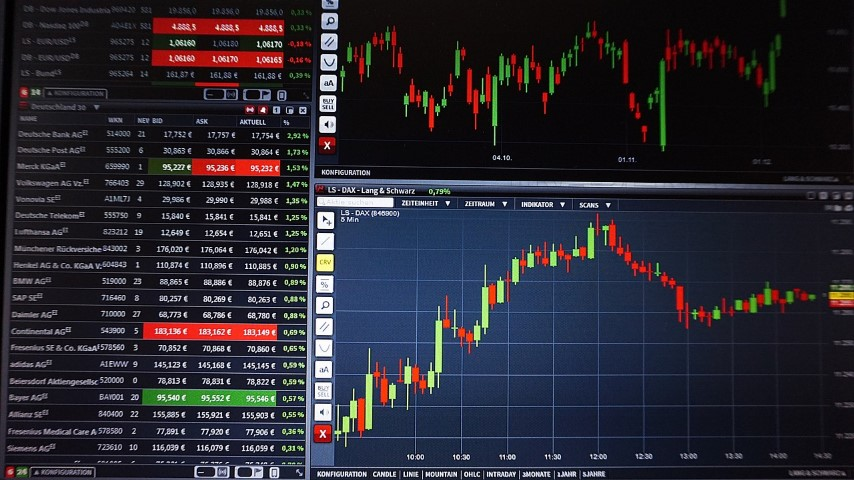

Bild von <a href="https://pixabay.com/de/users/pix1861-468748/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1905224">Csaba Nagy</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1905224">Pixabay</a>

# 1 | Projektauftrag
---

**Ziel:**

Erstellung Sie ein Skript, mit dem man Aktienkurse zu verschiedenen Unternehmen der lezten 12 Monate bei yahoo finance abfragen kann. Die Kurse sind in einem Linendiagramm zu visualisieren.




**Hauptaufgaben:**

+ Lesen der Aktienkurse (close) bei yahoo finance.
+ Erstellen Liniendiagramme
+ Speichern der Aktienkurse als csv-Datei

# 2 | Lösungsvorschlag
---

In [ ]:
import yfinance as yf
import plotly.express as px
import pandas as pd

In [ ]:
# Tickersymbole der Aktien
tickers = ["AAPL", "GOOGL", "TSLA", "DTE"]

# Historische Daten für jeden Ticker abrufen und in einem DataFrame speichern
historical_data = {}
for ticker in tickers:
    stock_data = yf.Ticker(ticker)
    historical_data[ticker] = stock_data.history(period="1y")['Close']

In [ ]:
# DataFrame für die Visualisierung vorbereiten
df_visualization = historical_data[tickers[0]].to_frame(name=tickers[0])
for ticker in tickers[1:]:
    df_visualization = df_visualization.join(historical_data[ticker].to_frame(name=ticker))

In [ ]:
# Visualisierung der Schlusskurse mit Plotly Express
fig = px.line(df_visualization, title='Historische Schlusskurse der Aktien')
fig.update_xaxes(title_text='Datum')
fig.update_yaxes(title_text='Schlusskurs in USD')
fig.show()

In [ ]:
# Speichern der Daten in einer CSV-Datei
csv_file_name = "historical_stock_prices.csv"
df_visualization.to_csv(csv_file_name)
print(f"Die Daten wurden erfolgreich in {csv_file_name} gespeichert.")

# 3 | Deployment
---

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  .py-Datei erstellen</font> </br></p>
# %%writefile app.py
